In [100]:
# importing all the libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config 

In [101]:
# Loading dataset
Nashville = pd.read_csv("Nashville_housing_data_2013_2016.csv")
Nashville.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [103]:
Nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [104]:
Nashville.isnull().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

In [105]:
Nashville.shape

(56636, 31)

In [106]:
Nashville["Bedrooms"] = Nashville["Bedrooms"].fillna(method='ffill')
Nashville["Property Address"] = Nashville["Property Address"].fillna(method='ffill')
Nashville["Property City"] = Nashville["Property City"].fillna(method='ffill')
Nashville["Owner Name"] = Nashville["Owner Name"].fillna(method='ffill')
Nashville["Address"] = Nashville["Address"].fillna(method='ffill')
Nashville["City"] = Nashville["City"].fillna(method='ffill')
Nashville["State"] = Nashville["State"].fillna(method='ffill')
Nashville["Acreage"] = Nashville["Acreage"].fillna(method='ffill')
Nashville["Tax District"] = Nashville["Tax District"].fillna(method='ffill')
Nashville["Neighborhood"] = Nashville["Neighborhood"].fillna(method='ffill')
Nashville["image"] = Nashville["image"].fillna(method='ffill')
Nashville["Land Value"] = Nashville["Land Value"].fillna(method='ffill')
Nashville["Building Value"] = Nashville["Building Value"].fillna(method='ffill')
Nashville["Total Value"] = Nashville["Total Value"].fillna(method='ffill')
Nashville["Finished Area"] = Nashville["Finished Area"].fillna(method='ffill')
Nashville["Foundation Type"] = Nashville["Foundation Type"].fillna(method='ffill')
Nashville["Year Built"] = Nashville["Year Built"].fillna(method='ffill')
Nashville["Exterior Wall"] = Nashville["Exterior Wall"].fillna(method='ffill')
Nashville["Grade"] = Nashville["Grade"].fillna(method='ffill')
Nashville["Full Bath"] = Nashville["Full Bath"].fillna(method='ffill')
Nashville["Half Bath"] = Nashville["Half Bath"].fillna(method='ffill')
Nashville["Suite/ Condo   #"] = Nashville["Suite/ Condo   #"].fillna(method='ffill')


Here I found there are so many null values in the dataset so I tried to fill the null values with ffill.

In [107]:
Nashville.isnull().sum()

Unnamed: 0                           0
Unnamed: 0.1                         0
Parcel ID                            0
Land Use                             0
Property Address                     0
Suite/ Condo   #                     0
Property City                        0
Sale Date                            0
Sale Price                           0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Owner Name                           1
Address                              1
City                                 1
State                                1
Acreage                              1
Tax District                         1
Neighborhood                         1
image                                1
Land Value                           1
Building Value                       1
Total Value                          1
Finished Area                        1
Foundation Type                      1
Year Built               

In [109]:
Nashville.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,8,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,8,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,8,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,8,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [110]:
Nashville.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,56635.000000,56635.000000,5.663500e+04,5.663500e+04,5.663500e+04,56635.000000,56635.000000,56635.000000,56635.000000,56635.000000
mean,28317.50000,28317.50000,3.272111e+05,0.648223,4353.737848,7.467198e+04,1.689785e+05,2.459946e+05,2002.943806,1969.206586,3.121409,1.968712,0.311927
std,16349.54926,16349.54926,9.287425e+05,3.019697,2208.200887,1.080423e+05,2.008163e+05,2.736333e+05,1422.749149,26.889911,0.854115,0.962376,0.500476
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.190000,3130.000000,2.300000e+04,7.760000e+04,1.062000e+05,1261.000000,1950.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.280000,4028.000000,3.100000e+04,1.155000e+05,1.563000e+05,1708.000000,1968.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.490000,6228.000000,7.000000e+04,1.985000e+05,2.950000e+05,2366.000000,1987.000000,4.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [111]:
new_Nashville = Nashville.drop(0)

In [112]:
new_Nashville.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,8,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,8,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,8,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,8,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,5,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,8,NASHVILLE,2013-01-04,93736,20130118-0006110,...,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [113]:
new_Nashville.isnull().sum()

Unnamed: 0                           0
Unnamed: 0.1                         0
Parcel ID                            0
Land Use                             0
Property Address                     0
Suite/ Condo   #                     0
Property City                        0
Sale Date                            0
Sale Price                           0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Owner Name                           0
Address                              0
City                                 0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
image                                0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built               

Eventhough I filled null values using ffill I can still see there are some null values in all the columns for the first row so I have deleted the first row. Now I can see there are no null values in the dataset. 

<AxesSubplot:>

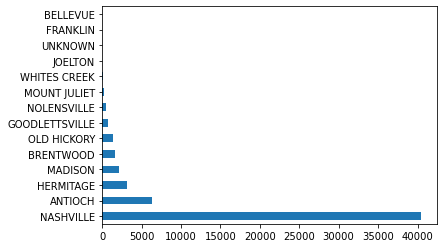

In [114]:
new_Nashville['Property City'].value_counts().plot(kind='barh')

There are more properties in Nashville

(array([5.6234e+04, 2.3900e+02, 3.1000e+01, 7.0000e+00, 9.4000e+01,
        2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([5.00000000e+01, 2.71395050e+06, 5.42785100e+06, 8.14175150e+06,
        1.08556520e+07, 1.35695525e+07, 1.62834530e+07, 1.89973535e+07,
        2.17112540e+07, 2.44251545e+07, 2.71390550e+07, 2.98529555e+07,
        3.25668560e+07, 3.52807565e+07, 3.79946570e+07, 4.07085575e+07,
        4.34224580e+07, 4.61363585e+07, 4.88502590e+07, 5.15641595e+07,
        5.42780600e+07]),
 <BarContainer object of 20 artists>)

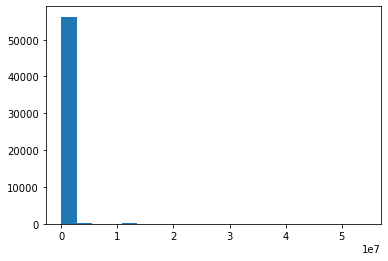

In [115]:
plt.hist(new_Nashville['Sale Price'], bins=20)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 9.0000e+00,
        1.3000e+01, 2.2000e+01, 1.4300e+02, 4.8300e+02, 1.5940e+03,
        5.5570e+03, 2.0928e+04, 1.9213e+04, 6.2780e+03, 1.6800e+03,
        3.3800e+02, 2.3800e+02, 1.0200e+02, 2.3000e+01, 7.0000e+00]),
 array([ 3.91202301,  4.60690339,  5.30178377,  5.99666415,  6.69154453,
         7.38642492,  8.0813053 ,  8.77618568,  9.47106606, 10.16594645,
        10.86082683, 11.55570721, 12.25058759, 12.94546798, 13.64034836,
        14.33522874, 15.03010912, 15.7249895 , 16.41986989, 17.11475027,
        17.80963065]),
 <BarContainer object of 20 artists>)

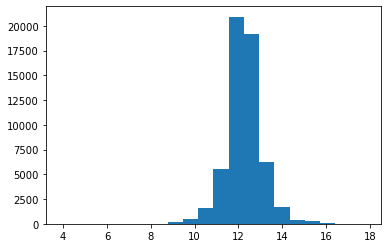

In [116]:
new_Nashville['log_sale_price'] = np.log(new_Nashville['Sale Price'])
plt.hist(new_Nashville['log_sale_price'], bins=20)

Applied log to the sale price

<AxesSubplot:>

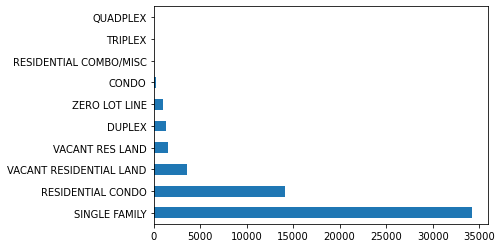

In [117]:
new_Nashville['Land Use'].value_counts()[:10].plot(kind='barh')

In [118]:
new_Nashville['Land Use'].value_counts()

SINGLE FAMILY                                 34268
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3586
VACANT RES LAND                                1575
DUPLEX                                         1389
ZERO LOT LINE                                  1049
CONDO                                           252
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
FOREST                                           10
GREENBELT                                        10
PARSONAGE   

In [119]:
duplicate_address = new_Nashville.loc[(new_Nashville['Property Address'].duplicated())]
duplicate_address['Land Use'].value_counts()

RESIDENTIAL CONDO                      6043
SINGLE FAMILY                          4081
VACANT RESIDENTIAL LAND                 888
VACANT RES LAND                         236
CONDO                                   118
DUPLEX                                  100
ZERO LOT LINE                            54
CONDOMINIUM OFC  OR OTHER COM CONDO      23
RESIDENTIAL COMBO/MISC                   12
TRIPLEX                                   4
DORMITORY/BOARDING HOUSE                  2
CHURCH                                    2
TERMINAL/DISTRIBUTION WAREHOUSE           1
VACANT RESIENTIAL LAND                    1
MOBILE HOME                               1
GREENBELT/RES\r\nGRRENBELT/RES            1
Name: Land Use, dtype: int64

In [120]:
duplicate_address.loc[duplicate_address['Land Use'] == 'RESIDENTIAL CONDO']['Multiple Parcels Involved in Sale'].describe()

count     6043
unique       2
top         No
freq      5640
Name: Multiple Parcels Involved in Sale, dtype: object

In [121]:
duplicate_address.loc[duplicate_address['Land Use'] == 'RESIDENTIAL CONDO']['Sale Price'].describe()

count    6.043000e+03
mean     4.129025e+05
std      1.968928e+06
min      5.750000e+03
25%      1.400000e+05
50%      2.314000e+05
75%      3.500000e+05
max      5.427806e+07
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Month', ylabel='count'>

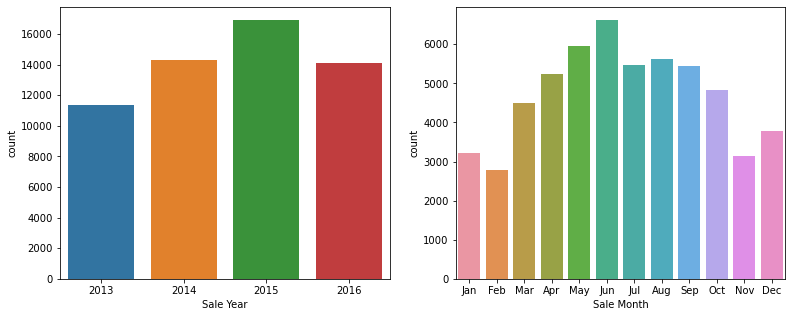

In [122]:
 # split the data based on year of sale. 
Nashville['Sale Year'] = Nashville['Sale Date'].str[:4]
Nashville['Month'] = Nashville['Sale Date'].str[5:7]
Nashville['Day'] = Nashville['Sale Date'].str[8:10]
Nashville['Sale Month'] = Nashville.Month.map({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr','05': 'May',
                                           '06': 'Jun','07': 'Jul','08': 'Aug','09': 'Sep','10': 'Oct',
                                           '11': 'Nov','12': 'Dec'})
Nashville['Sale Day'] = Nashville.Day.astype(float)
Nashville.drop('Month', axis=1)
Nashville.drop('Day', axis=1)

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(13,5))
sns.countplot(x='Sale Year', data=Nashville, ax = axis1)
sns.countplot(x='Sale Month', data=Nashville, ax = axis2)

Sales tend to be concentrated in the middle of the year and at the end of the month

[Text(0, 0.5, 'Acreage')]

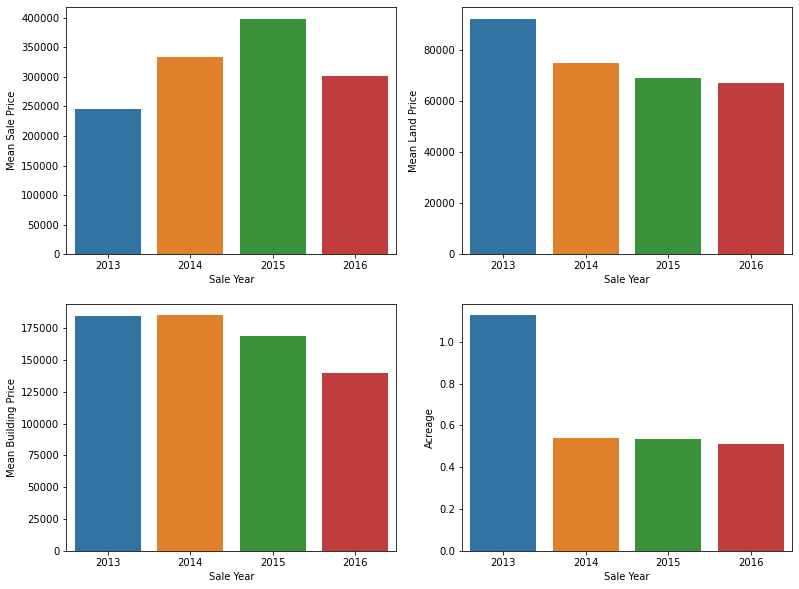

In [123]:
f, ax = plt.subplots(2, 2, figsize=(13,10))

sale_price = Nashville[["Sale Year", "Sale Price"]].groupby(['Sale Year'], as_index = False).mean()
sns.barplot(x= 'Sale Year', y = 'Sale Price', data=sale_price, ax=ax[0,0]).set(ylabel='Mean Sale Price')

land_price = Nashville[["Sale Year", "Land Value"]].groupby(['Sale Year'], as_index = False).mean()
sns.barplot(x= 'Sale Year', y = 'Land Value', data=land_price, ax=ax[0,1]).set(ylabel='Mean Land Price')

building_price = Nashville[["Sale Year", "Building Value"]].groupby(['Sale Year'], as_index = False).mean()
sns.barplot(x= 'Sale Year', y = 'Building Value', data=building_price, ax=ax[1,0]).set(ylabel='Mean Building Price')

acreage = Nashville[["Sale Year", "Acreage"]].groupby(['Sale Year'], as_index = False).mean()
sns.barplot(x= 'Sale Year', y = 'Acreage', data=acreage, ax=ax[1,1]).set(ylabel='Acreage')

Results are a bit mixed here, this could be a result of some outliers that need to be removed, the sparseness of the data set, or a mix of both. A deeper dive into the data is needed here. I will start by separating sale prices by time of year.

[Text(0, 0.5, 'Sale Price by Month')]

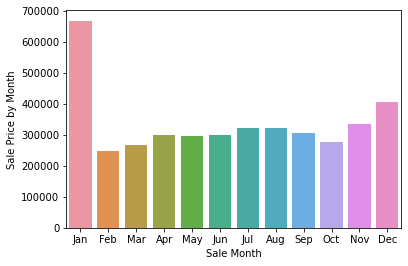

In [124]:
sale_month = Nashville[["Sale Month", "Sale Price"]].groupby(['Sale Month'], as_index = False).mean()
sns.barplot(x= 'Sale Month', y = 'Sale Price', data=sale_month, 
            order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(ylabel='Sale Price by Month')

It appears that prices in January are significantly higher than the other months of the year

[Text(0, 0.5, 'Sale Price by Month')]

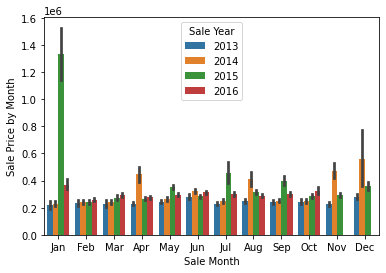

In [125]:
sns.barplot(x= 'Sale Month', y = 'Sale Price', data=Nashville, hue=Nashville['Sale Year'], 
            order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(ylabel='Sale Price by Month')

Splitting the data further it appears that there were some large sales in January of 2015 that probably skews most of the data

[Text(0, 0.5, 'Sale Price by Day')]

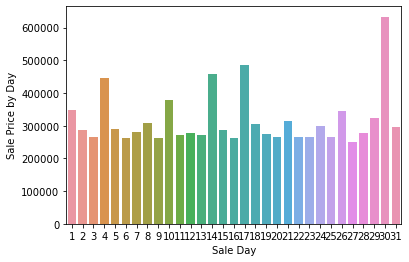

In [126]:
sale_day = Nashville[["Sale Day", "Sale Price"]].groupby(['Sale Day'], as_index = False).mean()
sns.barplot(x= 'Sale Day', y = 'Sale Price', data=sale_day, 
           order =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]).set(ylabel='Sale Price by Day')


[Text(0, 0.5, 'Sale Price by Day')]

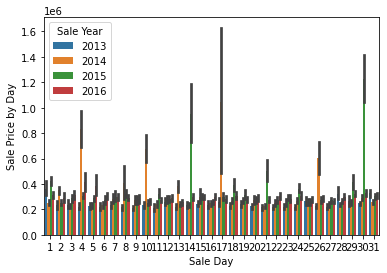

In [127]:
sns.barplot(x= 'Sale Day', y = 'Sale Price', data=Nashville, hue=Nashville['Sale Year'], 
            order =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]).set(ylabel='Sale Price by Day')

Besides the main spike in the 17th from the $54 million sale, I suspect there were a large number of sales on the 30th of January in 2015 that spiked the average sales.

In [180]:
df = pd.DataFrame(new_Nashville, columns = ['log_sale_price', 'Land Value','Building Value','Total Value'])
df.head()

,log_sale_price,Land Value,Building Value,Total Value
1,12.162643,32000.0,134400.0,168300.0
2,12.216023,34000.0,157800.0,191800.0
3,10.373491,25000.0,243700.0,268700.0
4,11.532728,25000.0,138100.0,164800.0
5,11.448238,25000.0,86100.0,113300.0


In [181]:
X = pd.get_dummies(df).drop(columns = 'log_sale_price')
y = df['log_sale_price'].values

# Linear regression

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [183]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
X_train.shape, X_test.shape

((45308, 3), (11327, 3))

In [185]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 0.30432634  0.24962135 -0.14733221]
Variance score: 0.16122911501828985


In [186]:
y_pred = reg.predict(X_test)

In [187]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5289092800610538
0.5751301933265981
0.7583733864835963


# Random Forest Regressor

In [188]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [189]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.43 degrees.


In [190]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.41 %.


#  DecisionTreeRegressor

In [191]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [192]:
 # Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [193]:
set_config(print_changed_only=False) 
 
dtr = DecisionTreeRegressor()
print(dtr)
 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [194]:
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 


R-squared: 0.6757487628671122


In [195]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4649233966383702
0.4539808417340541
0.6737810042840731


# GradientBoostingRegressor

In [196]:
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(X_test[1:2])

reg.score(X_test, y_test)


0.43251288877169414

In [197]:
y_pred = reg.predict(X_test)

In [198]:
print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

83.01998572170794
11135.49255739397
105.52484331849999


By looking at the above models, I observed that the mean absolute error is less in Random Forest Regressor i.e., 0.43 and from this I can say that real estate company should use Random Forest Regressor for getting more accurate results.